# Predicting Google Stock Prices With Recurrent Neural Networks (RNN)

 ## Table of Contents

* [Background](#Background)
    * [Long Short-Term Memory Networks (LSTM)](#Long-Short-Term-Memory-Networks-(LSTM))
* [Example](#Example)
    * [Data Preprocessing](#Data-Preprocessing)
    * [Building the Model](#Building-the-Model)
    * [Predictions](#Predictions)
    * [Results](#Results)
    * [Adding Features](#Adding-Features)
        * [Results](#Results)

## Background 

The **Recurrent Neural Network (RNN)** is yet another variation of the 'deep' artificial neural network. RNNs are, in fact, one of the most advanced forms of NNs often utilized for tasks that require the analysis of data streams that possess sequential patterns. Such tasks include textual language translation, speech to text transcription, and time series analysis. More generally, RNNs allow for neural networks to discover patterns that require knowledge of what has come before; in a way, RNNs are able to 'understand' time. 

RNNs are built with the intention of bestowing upon models the capacity for short term and long term memory in much the same way that humans possess. This is primarily achieved by feeding the output(s) of the model back into itself as along with the newest set of inputs. Below is a diagram of the process of a RNN.

![](images/img_9.png)

Each vertical layer of the diagram represents the same NN, made up of several layers, which exists throughout the process. In the beginning, the model recieves some input and provides an output. Now, this output is fed back into itslef along with the new input in the following step. This process continues on until no more new data is fed into the model; at which point, a final prediction is produced. 

There are several types of input-output relationships that RNNs can model. These included **One-to-Many, Many-to-One,** and **Many-to-Many** each of which dictate how many input and ouputs the RNN will have. The selection of how many input and output nodes the model will possess is dependent on the function, or goal, of the RNN. For example, having a computer look at an image and provide it with a description would be a One-to-Many relationship; the single input being the image and the multiple outputs being the words of the sentence it produces.

As remarkable as this model may seem, there is a problem that arises due to this temporal structure; this problem is called **The Vanishing Gradient Problem**. As with any NN, each layer is trained by adjusting the weights across the connections between nodes, throughout the network, using gradient descent. If the adjustments to the layers before it were small, then adjustments to the following layer will be even smaller causing the gradient to 'vanish'. On the other hand, if the adjustments to the layers before it were large, then adjustments to the following layer will be even larger causing the gradient to 'explode'. It is here that the problem lies. 

One can calculate a cost function for each output node of each time step of the RNN. When doing back propagation, each node in a layer calculates it’s gradient with respect to the effects of the gradients in the layer before it. When the algorithm propogates over each time step to update the recurrent connection(s), the gradient must multiply itself my the weight as many times as there were time steps in the loop. Because you're unraveling the temporal loop the further you go back through the network, the smaller the gradient becomes and the harder it becomes to train the weights which has a domino effect on the weights farther back, temporally, not physically, in the network. On the other hand, if the weight is large, then the gradient explodes rather than vanishing. Below is an illustration using the previous diagram.

![](images/img_10.png)

As you can see, when the error, E(t=n), is determined, gradient descent begins to propogate back to each time step from t=n to t=0 multiplying the recurrent weight everytime. The gree delta symbol represents the gradient value as it propogates through, updating the weights. But, as it propogates it becomes smaller and smaller until it has little to no effect on the connections at the beginning time step. What all this culminates to is the illusion of the network being trained, when in fact it is not, leading to excessive increases in the amount of time required to fully train RNNs. After decades of research, various solutions have been developed to address the problems of both vanishing and exploding gradients the most popular of which are listed below.

* Exploding Gradient

    * Truncated Backpropogation
    
    * Penalties 
    
    * Gradient Clipping

* Vanishing Gradient

    * Weight Initialization
    
    * Echo State Networks
    
    * Long Short-Term Memory Networks (LSTM)
    
It just so happens that **Long Short-Term Memory Networks** are the go-to standard for the implementation of RNNs. Let's take a closer look at LSTMs. 

### Long Short-Term Memory Networks (LSTM)

LSTMs were proposed as a solution to the vanishing/exploding gradient problem. The solution was simply to assign a weight of 1 to the recurrent connections. A value not so small as to vanish but not so big as to explode. LSTMs were first developed by Sepp Hochreiter and Jürgen Schmidhuber in 1991. 

An LSTM possesses the structure illustrated below. Although the diagram below shows the model at a single time step, you may picture this model being connected to itself in a horizontal fashion, much like in the first diagram, with each pass through itself representing each time step that the model goes through.

![](images/img_11.png)
*Source: (https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)*

The black node represents the input data into the mode at the current time step. The orange node is the output of the model from the previous time step being fed back into the model as input during the current time step. The blue node represents the culmination of many outputs of the model from all the previous time steps. You may think of the orange node as the 'short-term memory' of the model and the blue node as the 'long-term memory' of the model. It is important to note that the input data are vectors of multiple values and not a single value. The flow and contents of the memory that is propogated through the model is controlled by **valves**, the 'x' and '+' which represnt element-wise multiplication and addition of the data vectors, respectively.  

As input enters the model, consisting of the long-term memory, short-term memory, new input data, and a bias vector, it, first, passes through a simple one-layer NN with a sigmoid activation function. The output vector of this network is then multiplied by the long-term memory. This process determines how much of the initial long-term memory, if any, is to be kept. The second NN is similar to the first, possessing the same structure and inputs, which determines how much the short-term memory should change the old long-term memory. Meanwhile, an adjacent NN creates the new short-term memory with the new input data and short-term memory of the previous time step, along with a bias vector. This NN also has one layer but uses the Hyperbolic Tanget (tanh) as its activation function. The results of these two NNs are multiplied and then added to the old long-term memory. Finally, the output of the model is determined. The new long-term memory, the old short-term memory, the new input data, and a bias vector are added and put through a sigmoid function which is then multiplied by the new long-term memory after it is passed through a tanh function. This result exits the model as the final output of the curent time step and is also copied to serve as the short-term memory of the next time step. This is the structure that controls the flow of new and old memory through the different time steps of the model.

There are several variations on the LSTM structure that exist which has been explored at length in *'LSTM: A Search Space Odyssey'* by Klaus Greff et al. (2015).

For further reading, [*'The Unreasonable Effectiveness of Recurrent Neural Networks'*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) provides an in-depth discussion of RNNs, discussing how they operate for various practical applications. 

## Example

Now that we have a high-level understanding of RNNs, we can proceed to implementing them to solve a real world problem thanks to the Keras package we have used in the past. In this example, we will attempt to predict the future values of Google's stock price. The model will be trained on 5 years of Google stock prices, 2012-2017, and this will be used to predict the general trend, upward or downward, of the stock for the month of January of 2017.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
%matplotlib inline

In [3]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [4]:
train_data.head(5)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,324.360352,331.916199,324.077179,330.555054,7400800
1,2012-01-04,330.366272,332.959412,328.175537,331.980774,5765200
2,2012-01-05,328.925659,329.839722,325.994720,327.375732,6608400
3,2012-01-06,327.445282,327.867523,322.795532,322.909790,5420700
4,2012-01-09,321.161163,321.409546,308.607819,309.218842,11720900


In [5]:
test_data.head(5)

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,1335200
3,2017-01-06,795.260010,807.900024,792.203979,806.150024,1640200
4,2017-01-09,806.400024,809.966003,802.830017,806.650024,1272400


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.0+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Date      20 non-null object
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ KB


In [8]:
train_data.shape

(1258, 6)

In [9]:
test_data.shape

(20, 6)

Based on the preliminary information about our data, we have 1,258 observations to train on with 6 features. Our testset consists of 20 data points and 6 features as well. For the initial run-through, we will only have the RNN train on a single feature, the past stock prices, in order to predict the stock price of the following day. Later on, we will test if the addition of the other features improves the accuracy of our model.

Below is a nice plot of the Google stock price from 2012 to 2017.

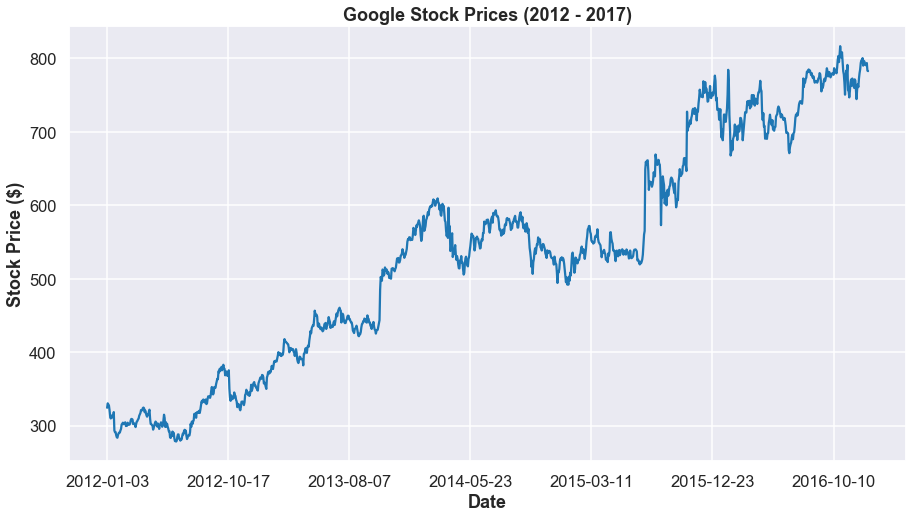

In [13]:
sns.set_style('darkgrid')
sns.set_context("talk")

label_text = []
pos = [0,200, 400, 600, 800, 1000, 1200]
for num in pos:
    label_text.append(train_data.iloc[num,0])

plt.figure(figsize=(15,8))
sns.lineplot(data = train_data.iloc[:,1])
plt.title('Google Stock Prices (2012 - 2017)', weight = 'bold')
plt.xlabel('Date', weight = 'bold')
plt.ylabel('Stock Price ($)', weight = 'bold')
plt.xticks(np.array(pos),labels = label_text);

### Data Preprocessing

In [14]:
# Extrating the prices the model will be trained on 

training_prices = train_data.iloc[:, 1:2].values

# Normalizing the data

sc = MinMaxScaler(feature_range = (0,1))
scaled_training_prices = sc.fit_transform(training_prices)

# Creating the input and output data of the RNN
# Setting the number of time steps the RNN will look back and train on; we will use 60 (arbitrary)

x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(scaled_training_prices[i-60:i, 0])
    y_train.append(scaled_training_prices[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Building the Model

In [15]:
# Initializing the RNN

regressor = Sequential()

# Adding the LSTM layers with Dropout Regularization 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) # first LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) # second LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) # third LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) # fourth LSTM layer
regressor.add(Dropout(0.2))

# Adding the output layer

regressor.add(Dense(units = 1))

# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the training set

pd.set_option('display.max_rows', 20)  

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0463
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0054
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 9s 7ms/step - 

1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0015


### Predictions

In [16]:
# Getting the true stock prices

test_prices = test_data.iloc[:,1:2].values

# Concatenateing all price data together

complete_dataset = pd.concat((train_data['Open'], test_data['Open']), axis = 0) # getting all price data

# Getting the test prices as well as the 60 prices previous to the first test value

inputs = complete_dataset[len(complete_dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)

# Scaling the data

inputs = sc.transform(inputs)

# Turnig the data to the necessary 3D structure

x_test = []

for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Producing the stock price predictions

predictions = regressor.predict(x_test)
predictions = sc.inverse_transform(predictions) # reversing the scaling on the values into prices

### Results

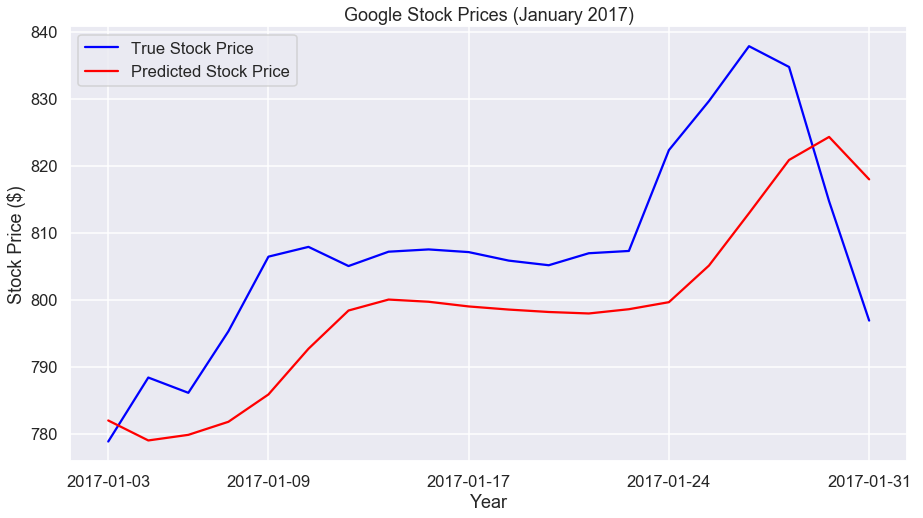

In [17]:
# Visualizing the final result

# Creating a dataframe of the results

results_df = test_data.iloc[:,0:2]
results_df['Predicted Open'] = pd.Series(list(predictions.flat))

label_text = []
pos = [0,4,9,14,19]
for num in pos:
    label_text.append(results_df.iloc[num,0])

plt.figure(figsize=(15,8))
sns.lineplot(data = results_df['Open'], color = 'blue')
sns.lineplot(data = results_df['Predicted Open'], color = 'red')
plt.title('Google Stock Prices (January 2017)')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.xticks(np.array(pos),labels = label_text)
plt.legend(labels = ['True Stock Price','Predicted Stock Price']);

In [18]:
# Mean squared error of predictions 

MSE = sum((results_df['Open'] - results_df['Predicted Open'])**2)
MSE

3922.5057649179894

### Adding Features

Surprisingly enough, our model has been able to reproduce the general trend of the change in Google's stock price failry well for the month of January of 2017. Quantitatively, the mean squared error of the predictions turns out to be 3922.51. Let's see if adding in the other features in the dataset can decrease the error any further.

In [20]:
# Data
train_data.head(3)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,324.360352,331.916199,324.077179,330.555054,7400800
1,2012-01-04,330.366272,332.959412,328.175537,331.980774,5765200
2,2012-01-05,328.925659,329.839722,325.994720,327.375732,6608400


In [21]:
test_data.head(3)

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,1335200


In [22]:
# Data preprocessing

train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

train_data['Volume'] = train_data['Volume'].map(lambda x: float(x))
test_data['Volume'] = test_data['Volume'].map(lambda x: float(x))

training_data = train_data.iloc[:,1:].values # Using multiple predictors.

 
sc = MinMaxScaler(feature_range = (0,1)) # Features scaling
scaled_training_data = sc.fit_transform(training_data)
 

x_train = []        # Creating a data structure with 60 timesteps and 1 output
y_train = []

for i in range(60, 1258):
    x_train.append(scaled_training_data[i-60:i,])
    y_train.append(scaled_training_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))

In [23]:
# Building the model

regressor = Sequential() # Initializing the RNN

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 5))) # first LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) # second LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) # third LSTM layer
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) # fourth LSTM layer
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1)) # Adding the output layer

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the RNN

In [24]:
# Training the model 

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0393
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0042
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 9s 8ms/step - 

1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0012


In [25]:
# Predictions

test_prices = test_data.iloc[:,1:2].values # Getting the true stock prices

complete_dataset = pd.concat((train_data.iloc[:,1:], test_data.iloc[:,1:]), axis = 0) # getting all price data

inputs = complete_dataset.iloc[len(complete_dataset) - len(test_data) - 60:,].values

inputs = sc.transform(inputs) # Scaling the data

x_test = []

for i in range(60, 80):
    x_test.append(inputs[i-60:i,])
    
x_test = np.array(x_test)

predictions = regressor.predict(x_test) # Producing the stock price predictions

aug_preds = np.zeros(shape=(len(predictions), 5))
aug_preds[:,0] = predictions.reshape(predictions.shape[0],)

predictions = sc.inverse_transform(aug_preds)[:,0] # reversing the scaling on the values into prices

### Results

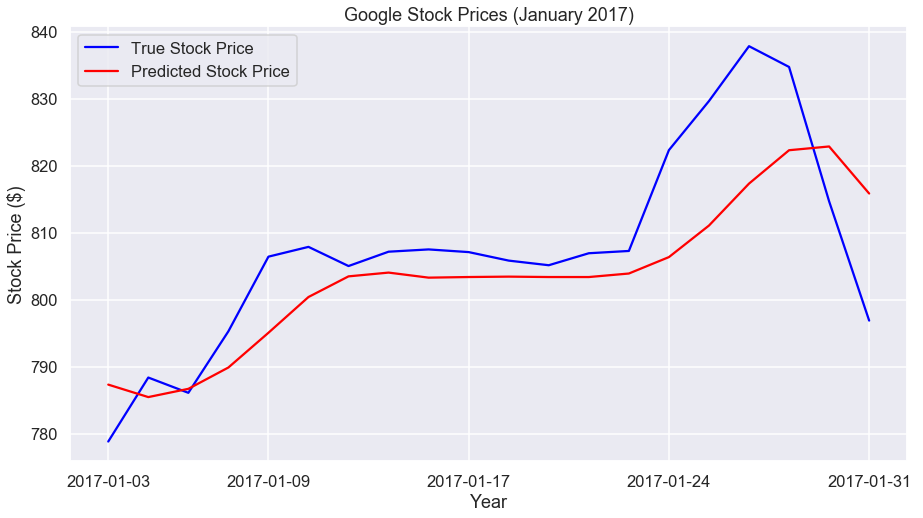

In [26]:
# Visualizations

# Creating a dataframe of the results

results_df = test_data.iloc[:,0:2]
results_df['Predicted Open'] = pd.Series(list(predictions.flat))

label_text = []
pos = [0,4,9,14,19]
for num in pos:
    label_text.append(results_df.iloc[num,0])

plt.figure(figsize=(15,8))
sns.lineplot(data = results_df['Open'], color = 'blue')
sns.lineplot(data = results_df['Predicted Open'], color = 'red')
plt.title('Google Stock Prices (January 2017)')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.xticks(np.array(pos),labels = label_text)
plt.legend(labels = ['True Stock Price','Predicted Stock Price']);

In [27]:
# Mean squared error of predictions 

MSE = sum((results_df['Open'] - results_df['Predicted Open'])**2)
MSE

1973.2800333769303

In [28]:
(MSE/3922.5057649179894)

0.5030661907563027

These are great results. By utilizing all of the information provided to us in the original dataset, we were able to cut our error rate in half from 3,923 to 1,973. Additionally, we can see on the graph above that our lines, both predicted and true stock price, are much closer than they were before. This new model is able to predict the trend of future stock prices more accurately than our original model. It is likely that this model could be improved even further by using more data and further tweaking the parameters of the model structure. This goes to show just how powerful recurrent neural networks can be when used to discover patterns in sequential data.